In [21]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import pickle as pk

In [22]:
dataset = pd.read_csv('spam.csv')

In [23]:
df = pd.DataFrame(dataset)

In [24]:
df.columns = df.columns.str.strip()

In [25]:
df.Category = df.Category.replace(['spam','ham'],[0,1])

In [26]:
X = df['Message']
y = df['Category']

In [27]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2)

In [28]:
cv = CountVectorizer(stop_words='english')

In [29]:
x_train = cv.fit_transform(x_train)
x_test = cv.transform(x_test)

In [30]:
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)
y_pred = KNN.predict(x_test)
score_KNN = KNN.score(x_test,y_test)

In [31]:
SVC = SVC()
SVC.fit(x_train,y_train)
y_pred = SVC.predict(x_test)
score_SVC = SVC.score(x_test,y_test)

In [32]:
LG = LogisticRegression()
LG.fit(x_train,y_train)
y_pred = LG.predict(x_test)
score_LG = LG.score(x_test,y_test)

In [38]:
RF = RandomForestClassifier()
RF.fit(x_train,y_train)
y_pred = RF.predict(x_test)
score_RF = RF.score(x_test,y_test)

In [36]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
y_pred = DT.predict(x_test)
score_DT = DT.score(x_test,y_test)

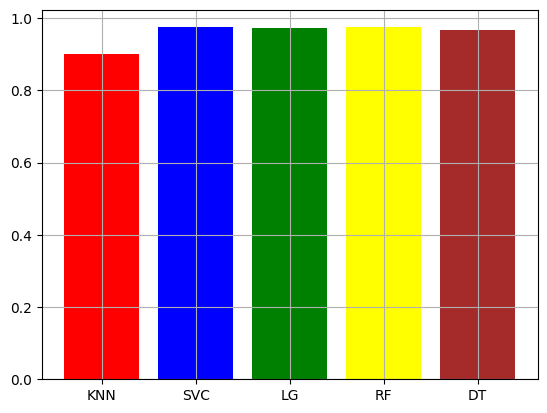

In [45]:
models = ['KNN','SVC','LG','RF','DT']
scores = [score_KNN,score_SVC,score_LG,score_RF,score_DT]
colors = ['red','blue','green','yellow','brown']
plt.bar(models,scores,color=colors)
plt.grid()
plt.savefig('models')
plt.show()

In [46]:
model = max(scores)
model

0.9748878923766816

In [47]:
pk.dump(model,open('model.pkl','wb'))